# P2P逾期预测建模
## 文章基本信息

+ 作者：孙晔
+ 课程：python与大数据分析
+ 学号：201519040
+ 课程编号：CMP245
+ 课序号：3
+ 指导老师：刘宁宁

## 摘要
本报告使用了逻辑回归模型，对给定的数据进行学习，预测客户是否会逾期还款。本文采取默认参数和最优参数两种设置进行比较，f1score可达到0.96。最后绘制ROC曲线。

In [1]:
# 导入所需库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

# 导入数据
riskdat =  pd.read_sas('riskdat.sas7bdat')
riskdat_c = riskdat.copy()

# 数据的维度: 2380个样本, 1033个自变量, 1个因变量
riskdat.shape

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\pandas\io\sas\sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\pandas\io\sas\sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

(2380, 1034)

In [2]:
# 查看数据
riskdat.head()

,customer_id,CDTB234,CDCT024,CDTP144,CDTB242,CDTB229,CDTB228,CDTB262,CDTB263,CDTB264,...,CDTP175,CDTP177,CDMC337,CDMC335,CDMC333,CDMC331,CDTB301,CDTB302,SignMth,y
0,12344.0,NaN,NaN,NaN,NaN,NaN,NaN,b' .',NaN,b' .',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b' 201704',0.0
1,12637.0,200.00,0.0,200.0,0.00,b's24',200.00,b'5810',400.0,"b'""null""'",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201707',0.0
2,12770.0,38.15,0.0,0.0,504.00,b'S22',504.00,b' 1910',921.0,b' 1000',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201704',0.0
3,15819.0,NaN,NaN,NaN,NaN,NaN,NaN,b' .',NaN,b' .',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b' 201707',0.0
4,15819.0,100.00,0.0,200.0,916.67,b's22',916.67,b'1910',800.0,"b'""null""'",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201707',0.0


In [5]:
riskdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Columns: 1034 entries, customer_id to y
dtypes: float64(960), object(74)
memory usage: 18.8+ MB


In [4]:
riskdat.describe()

,customer_id,CDTB234,CDCT024,CDTP144,CDTB242,CDTB228,CDTB263,CDTB265,CDTB267,CDTB260,...,CDTP172,CDTP175,CDTP177,CDMC337,CDMC335,CDMC333,CDMC331,CDTB301,CDTB302,y
count,2380.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,...,2060.000000,2060.000000,2060.000000,2060.0,2060.0,2060.0,2060.0,2060.000000,2060.000000,2380.000000
mean,28537.078571,432.957345,0.026699,749.282650,4633.127738,4249.623917,7882.519549,1387.511117,391.614398,1.245631,...,0.035437,0.000485,0.000971,0.0,0.0,0.0,0.0,0.163592,0.153883,0.019328
std,4933.755575,1910.321802,0.161241,2199.145005,18693.881259,16127.483327,33448.734918,9095.568247,7048.467532,1.128833,...,0.223023,0.015576,0.031151,0.0,0.0,0.0,0.0,0.553969,0.530845,0.137703
min,12344.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,25840.500000,15.737500,0.000000,0.000000,25.000000,190.650000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,29494.500000,89.000000,0.000000,0.000000,548.825000,900.000000,1000.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,30677.000000,200.000000,0.000000,500.000000,2159.560000,2593.930000,4607.800000,200.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,42473.000000,51800.000000,1.000000,20000.000000,352809.000000,352809.000000,775823.000000,195091.280000,282580.000000,7.000000,...,3.000000,0.500000,1.000000,0.0,0.0,0.0,0.0,6.000000,6.000000,1.000000


In [3]:
# 目标变量在正负样本上的分布是不均匀的
riskdat.y.value_counts()

0.0    2334
1.0      46
Name: y, dtype: int64

In [4]:
riskdat.isnull().sum(axis=1) 

0       987
1         0
2        20
3       987
4         0
       ... 
2375      0
2376      0
2377      0
2378      0
2379      0
Length: 2380, dtype: int64

In [6]:
# 每个样本的缺失变量数
riskdat.missing_var = riskdat.isnull().sum(axis=1)

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [5]:
# 部分样本有90%以上的变量是缺失的, 直接删去这些样本
# 剩余2060个样本

# riskdat =  riskdat[riskdat.missing_var < 100]
riskdat = riskdat.loc[riskdat.missing_var < 100, :]
riskdat.shape

(2060, 1034)

In [6]:
riskdat.head()

,customer_id,CDTB234,CDCT024,CDTP144,CDTB242,CDTB229,CDTB228,CDTB262,CDTB263,CDTB264,...,CDTP175,CDTP177,CDMC337,CDMC335,CDMC333,CDMC331,CDTB301,CDTB302,SignMth,y
1,12637.0,200.00,0.0,200.0,0.00,b's24',200.00,b'5810',400.0,"b'""null""'",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201707',0.0
2,12770.0,38.15,0.0,0.0,504.00,b'S22',504.00,b' 1910',921.0,b' 1000',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201704',0.0
4,15819.0,100.00,0.0,200.0,916.67,b's22',916.67,b'1910',800.0,"b'""null""'",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201707',0.0
5,16218.0,27.50,0.0,500.0,48.00,b'S24',500.00,b' 7910',1648.0,b' 7930',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201706',0.0
6,17451.0,100.00,0.0,1500.0,3178.00,b'S22',3178.00,b' 5810',7913.0,b' .',...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b' 201706',0.0


In [9]:
riskdat_ =  riskdat.copy()

In [7]:
# 某些变量全部为0, 不能提供有效信息, 因此删除

riskdat = riskdat.loc[:, ~(riskdat == 0).all(axis=0)]


riskdat.shape

(2060, 977)

In [8]:
# 非数值型变量
riskdat_sub2 = riskdat.select_dtypes(include=['object'])
riskdat_sub2.head(3)

,CDTB229,CDTB262,CDTB264,CDTB266,CDTB268,CDTB269,CDTB270,CDCT018,CDMC292,CDMC299,...,CDTB153,CDCA006,CDCA007,CDTP090,CDCA001,CDCA003,CDCA005,CDCA004,CDCA002,SignMth
1,b's24',b'5810',"b'""null""'","b'""null""'",b'\xb9\xe3\xd6\xdd\xca\xd0',"b'""null""'","b'""null""'","b'""null""'",b'6011',"b'""null""'",...,"b'""null""'",b'cup',"b'""null""'","b'""null""'",b'debit',b'01',b'\xd6\xd0\xb9\xfa\xc5\xa9\xd2\xb5\xd2\xf8\xd0...,b'\xbd\xf0\xcb\xeb\xcd\xa8\xb1\xa6\xbf\xa8(\xd...,"b'""null""'",b' 201707'
2,b'S22',b' 1910',b' 1000',b' .',b'\xba\xf4\xba\xcd\xba\xc6',b'\xb1\xb1\xbe\xa9\xca\xd0',NaN,NaN,b' 4511',b' 7311',...,NaN,b'CUP',NaN,NaN,b'debit',b' 1',b'\xbd\xa8\xc9\xe8\xd2\xf8\xd0\xd0',b'\xbd\xe1\xcb\xe3\xcd\xa8\xbd\xe8\xbc\xc7\xbf...,NaN,b' 201704'
4,b's22',b'1910',"b'""null""'","b'""null""'",b'\xba\xf4\xba\xcd\xba\xc6\xcc\xd8\xca\xd0',"b'""null""'","b'""null""'","b'""null""'",b'5398',b'6011',...,b'\xba\xf4\xba\xcd\xba\xc6\xcc\xd8\xca\xd0',b'cup',b'\xc2\xc3\xd3\xce\xbf\xa8',"b'""null""'",b'debit',b'01',b'\xb9\xa4\xc9\xcc\xd2\xf8\xd0\xd0',b'\xb8\xa3\xc5\xa9\xc1\xe9\xcd\xa8\xbf\xa8',"b'""null""'",b' 201707'


In [9]:
# 仅抽取数值型变量
riskdat_sub1 = riskdat.select_dtypes(exclude=['object'])
riskdat_sub1.head(3)

,customer_id,CDTB234,CDCT024,CDTP144,CDTB242,CDTB228,CDTB263,CDTB265,CDTB267,CDTB260,...,CDTP173,CDTP171,CDTB303,CDTB304,CDTP172,CDTP175,CDTP177,CDTB301,CDTB302,y
1,12637.0,200.00,0.0,200.0,0.00,200.00,400.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12770.0,38.15,0.0,0.0,504.00,504.00,921.0,160.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15819.0,100.00,0.0,200.0,916.67,916.67,800.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 用均值填补缺失的数值变量
riskdat_sub1 = riskdat_sub1.fillna(riskdat_sub1.mean())
riskdat_sub1.shape

(2060, 903)

In [11]:
# 定义X与y方便建模
X1, y1 = riskdat_sub1.iloc[:, 1:-1], riskdat_sub1.y
X1.shape, y1.shape

((2060, 901), (2060,))

In [13]:
import sklearn
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

In [10]:
# 建模所需库
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [13]:
# 正负样本比例
np.mean(y1 == 0), np.mean(y1 == 1)

(0.98640776699029131, 0.013592233009708738)

In [14]:
# 训练集和测试集拆分
X1_train, X1_val, y1_train, y1_val = train_test_split(X1.values, y1.values, test_size=0.3, random_state=114)
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape

((1442, 901), (1442,), (618, 901), (618,))

In [15]:
# 训练集中的正负样本比例
np.mean(y1_train == 0), np.mean(y1_train == 1)

(0.9868238557558946, 0.013176144244105409)

In [16]:
# 构建一个逻辑回归模型, 采用默认参数设置
lr_clf1 = LogisticRegression(class_weight={0: 0.03, 1: 0.97})
lr_clf1.fit(X1_train, y1_train)
y1_train_pred = lr_clf1.predict(X1_train)


print("Confusion matrix (training):\n {0}\n".format(confusion_matrix(y1_train, y1_train_pred)))
print("Classification report (training):\n {0}".format(classification_report(y1_train, y1_train_pred)))

y1_val_pred = lr_clf1.predict(X1_val)
print("Confusion matrix (validation):\n {0}\n".format(confusion_matrix(y1_val, y1_val_pred)))
print("Classification report (validation):\n {0}".format(classification_report(y1_val, y1_val_pred)))

Confusion matrix (training):
 [[1370   53]
 [   1   18]]

Classification report (training):
              precision    recall  f1-score   support

        0.0       1.00      0.96      0.98      1423
        1.0       0.25      0.95      0.40        19

avg / total       0.99      0.96      0.97      1442

Confusion matrix (validation):
 [[565  44]
 [  6   3]]

Classification report (validation):
              precision    recall  f1-score   support

        0.0       0.99      0.93      0.96       609
        1.0       0.06      0.33      0.11         9

avg / total       0.98      0.92      0.95       618



In [17]:
# parameter tuning
# lr_clf_tuned = LogisticRegression(class_weight={0: 0.03, 1: 0.97})
# lr_clf_params = {
#     "penalty": ["l1", "l2"],
#     "C": [1, 1.3, 1.5, 1.7, 2]
# }
# lr_clf_cv = GridSearchCV(lr_clf_tuned, lr_clf_params, cv=5)
# lr_clf_cv.fit(X1_train, y1_train)
# print(lr_clf_cv.best_params_)

In [18]:
# 采用最优参数再次构建逻辑回归模型
lr_clf2 = LogisticRegression(penalty="l1", C=1.5, class_weight={0: 0.02, 1: 0.98})
lr_clf2.fit(X1_train, y1_train)
y1_train_pred = lr_clf2.predict(X1_train)
print("Confusion matrix (training):\n {0}\n".format(confusion_matrix(y1_train, y1_train_pred)))
print("Classification report (training):\n {0}".format(classification_report(y1_train, y1_train_pred)))

y1_val_pred = lr_clf2.predict(X1_val)
print("Confusion matrix (validation):\n {0}\n".format(confusion_matrix(y1_val, y1_val_pred)))
print("Classification report (validation):\n {0}".format(classification_report(y1_val, y1_val_pred)))

Confusion matrix (training):
 [[1423    0]
 [   0   19]]

Classification report (training):
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1423
        1.0       1.00      1.00      1.00        19

avg / total       1.00      1.00      1.00      1442

Confusion matrix (validation):
 [[586  23]
 [  7   2]]

Classification report (validation):
              precision    recall  f1-score   support

        0.0       0.99      0.96      0.98       609
        1.0       0.08      0.22      0.12         9

avg / total       0.97      0.95      0.96       618



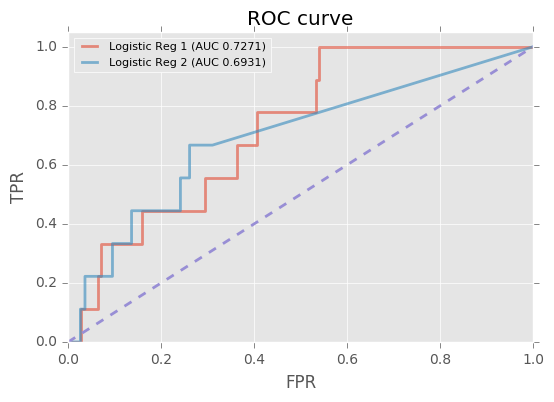

In [19]:
# 绘制ROC曲线
y1_valid_score_lr1 = lr_clf1.predict_proba(X1_val)
y1_valid_score_lr2 = lr_clf2.predict_proba(X1_val)

fpr_lr1, tpr_lr1, thresholds_lr1 = roc_curve(y1_val, y1_valid_score_lr1[:, 1])
fpr_lr2, tpr_lr2, thresholds_lr2 = roc_curve(y1_val, y1_valid_score_lr2[:, 1])

roc_auc_lr1 = auc(fpr_lr1, tpr_lr1)
roc_auc_lr2 = auc(fpr_lr2, tpr_lr2)

plt.plot(fpr_lr1, tpr_lr1, fpr_lr2, tpr_lr2, lw=2, alpha=.6)
plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend(["Logistic Reg 1 (AUC {:.4f})".format(roc_auc_lr1),
            "Logistic Reg 2 (AUC {:.4f})".format(roc_auc_lr2)], fontsize=8, loc=2)